In [4]:
%matplotlib inline

In [5]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# General imports
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import os

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Preprocessing tools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer

# Handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, balanced_accuracy_score, f1_score, roc_auc_score, roc_curve, auc

# Additional utility
from collections import Counter

# For handling multi-class labels in ROC curve
from sklearn.preprocessing import label_binarize

# Personalized Nutrition System: A Machine Learning Approach to Tailored Diets - part 2

## Issued by: Vesela Vekieva

## 1. Abstract

The increasing prevalence of chronic health conditions and the growing demand for personalized wellness solutions underscore the importance of tailored dietary recommendations. This project aims to develop a Personalized Nutrition System using machine learning (ML), designed to provide customized food suggestions based on an individual’s dietary habits, lifestyle factors, and health conditions. Leveraging a dataset focused on dietary habits and related metrics (e.g., age, weight, physical activity, and diet type), the system utilizes ML algorithms to classify users into distinct diet types and filter food recommendations aligned with their nutritional needs and health objectives. Key aspects of the project include handling data imbalances, encoding categorical variables, and employing suitable classification algorithms. Through rigorous evaluation and optimization, the ultimate goal is to develop a reliable and effective system capable of delivering precise and actionable dietary guidance.

## 2. Introduction

### 2.1. What is a Personalized Nutrition System?
A Personalized Nutrition System is a technology-driven approach that provides tailored dietary recommendations based on an individual's unique characteristics, preferences, and health conditions. The system integrates data on various factors such as age, weight, physical activity, food allergies, and health conditions to suggest food options that support an individual's wellness goals. Unlike general dietary guidelines, a personalized system is specifically designed to meet the needs of each user, helping them make informed decisions about their nutrition and lifestyle.

### 2.2. Problem Definition
With rising levels of chronic diseases and an increased awareness of the importance of diet in health outcomes, there is a growing demand for personalized nutrition solutions. Many existing systems either offer generalized advice or fail to accommodate specific dietary restrictions, preferences, and conditions such as allergies or intolerances. Additionally, existing tools are often not able to leverage the power of data science to personalize food recommendations based on both lifestyle and health factors. This project seeks to address these issues by creating a machine learning-based personalized nutrition system that provides individualized food suggestions.

### 2.3. Motivation
The motivation for this project stems from the increasing interest in wellness and health, with more individuals seeking personalized advice to manage their diets and health conditions. Traditional approaches to nutrition tend to be generalized and do not take into account the diversity of individual needs. By harnessing machine learning, this project aims to provide a more accurate, dynamic, and scalable solution that can cater to a wide variety of dietary preferences, health conditions, and lifestyle choices. Furthermore, this project could serve as a foundation for future applications in digital health and wellness.

### 2.4. Project Scope
The scope of this project is to develop a Personalized Nutrition System using machine learning techniques, focusing on the following:
- Data Analysis: Utilizing a dataset centered on lifestyle, dietary habits, and health-related factors to extract meaningful insights.
- Data Preprocessing: Addressing data imbalances, encoding categorical variables, and normalizing numerical features to enhance model performance.
- Modeling: Applying machine learning algorithms, such as Random Forest and XGBoost, to classify users into distinct diet types based on their habits and preferences.
- Evaluation: Implementing cross-validation, hyperparameter tuning, and rigorous testing to ensure model accuracy and robustness.
- Real-world Applicability: Creating a system that can potentially be integrated into nutrition and wellness platforms, empowering users to make informed and personalized dietary choices.

By addressing these areas, this project aims to offer a solution that moves beyond generalized dietary advice and caters to the specific nutritional needs of individuals.

## 3. Dataset Information

The success of a personalized nutrition system heavily depends on the quality and comprehensiveness of the data. In this project, I use one key dataset, focused on dietary habits and lifestyle. This dataset provides essential information that allows the system to make accurate recommendations based on users' preferences, habits, and health conditions.

__Dietary Habits and Lifestyle Dataset__

The dataset is sourced from a previous project (Personalized Nutrition System: A Data-Driven Approach to Tailored Dietary Recommendations) and is already cleaned, preprocessed, and ready for immediate use. It was generated with specific features related to diet, lifestyle, and health, chosen based on their relevance to personalized nutrition.

It contains information about users' dietary habits, health status, and lifestyle factors. It serves as the primary input for categorizing individuals into different diet types (e.g., vegetarian, vegan, omnivorous) and tailoring food recommendations accordingly. The dataset is designed to capture the following factors:

| **Category**         | **Features**                                                                 |
|-----------------------|------------------------------------------------------------------------------|
| **Demographics**      | Gender, Age, Height, Weight, BMI                                             |
| **Dietary Habits**    | Meal frequency, Fruit and vegetable intake, Snack frequency, Water and soft drink consumption, Coffee and alcohol intake |
| **Lifestyle**         | Exercise frequency, Smoking status, Sleep quality, Health conditions (e.g., diabetes, hypertension) |
| **Dietary Preferences** | Food allergies, Food intolerances                                           |
| **Target Variable**   | diet_typed, indicates main diet preferences              |

__Purpose in the project:__
This dataset is crucial for building a model that can classify users into specific diet types and recommend foods accordingly.
It helps to understand the relationship between lifestyle, health conditions, and diet choices.
By encoding categorical variables and normalizing numerical ones, the dataset is prepared for machine learning applications.

## 4. Data Preprocessing and Feature Engineering

### 4.1. Loading the Data

In [13]:
directory_path = '../data/'

with open(directory_path + 'dietry_habits_cleaned.pkl', 'rb') as f:
    dietry_habits_cleaned = pickle.load(f)

In [14]:
dietry_habits_cleaned.head()

,gender,age,height_cm,weight_kg,bmi,diet_type,daily_fruit_intake,daily_vegetable_intake,daily_meal_count,snack_frequency,...,soft_drinks_intake_l,daily_coffee_consumption,alcohol_consumption,food_allergies,food_intolerances,smoking_status,weekly_exercise_frequency,health_condition,sleep_quality,diet_type_encoded
0,Female,69,159,61.4,24.3,Vegetarian,2,4,1,Never,...,0.76,0,Moderate,No,No,Former Smoker,5,Hypertension,Fair,4
1,Male,25,172,79.6,26.9,Flexitarian,0,0,4,Sometimes,...,0.24,1,Never,No,No,Current Smoker,1,Healthy,Very Good,0
2,Male,46,180,86.5,26.7,Omnivorous,1,2,5,Sometimes,...,0.18,1,Occasional,No,No,Current Smoker,3,Heart Disease,Good,1
3,Female,49,163,70.4,26.5,Flexitarian,0,3,1,Rarely,...,0.21,0,Moderate,No,No,Current Smoker,1,Healthy,Poor,0
4,Female,45,178,71.9,22.7,Omnivorous,0,1,4,Never,...,0.47,3,Moderate,No,No,Former Smoker,1,Healthy,Fair,1


### 4.2. Selecting the Key Variable

The __diet_type__ is chosen as the key variable in this project because it serves as the primary factor for tailoring personalized dietary recommendations. This variable directly correlates with an individual's food preferences, restrictions, and overall nutritional needs. By classifying users into distinct diet types — such as vegetarian, vegan, omnivorous, or pescatarian — we can better understand the unique dietary requirements of each group.

Furthermore, __diet_type__ acts as a target variable for classification, allowing us to segment users effectively and recommend foods that align with their specific dietary patterns. Using this variable helps ensure that the recommendations are not only personalized but also aligned with the user’s lifestyle and health goals. Additionally, focusing on __diet_type__ enables us to manage and filter food suggestions based on preferences, allergies, and intolerances, enhancing the overall accuracy and relevance of the system.

In summary, __diet_type__ provides a clear, actionable basis for recommending food options that suit each individual’s dietary needs and preferences, making it the most suitable key variable for the model.

### 4.3. Data preprocessing

To begin with, I am creating a copy of dataset to preserve the original format and data. The subsequent preprocessing steps will be carried out on that copy. This way, I can always revert to the initial data and change the strategy if needed.
I will check for missing and/or duplicate values to ensure the integrity of the data. After that I will check the distribution of the values in key variable.

__Dietary Habits Dataset__

In [19]:
dietry_habits_normalized = dietry_habits_cleaned.copy()

In [20]:
dietry_habits_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 0 to 5087
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     5010 non-null   object 
 1   age                        5010 non-null   int64  
 2   height_cm                  5010 non-null   int64  
 3   weight_kg                  5010 non-null   float64
 4   bmi                        5010 non-null   float64
 5   diet_type                  5010 non-null   object 
 6   daily_fruit_intake         5010 non-null   int64  
 7   daily_vegetable_intake     5010 non-null   int64  
 8   daily_meal_count           5010 non-null   int64  
 9   snack_frequency            5010 non-null   object 
 10  water_intake_l             5010 non-null   float64
 11  soft_drinks_intake_l       5010 non-null   float64
 12  daily_coffee_consumption   5010 non-null   int64  
 13  alcohol_consumption        5010 non-null   object 
 1

In [21]:
dietry_habits_normalized.drop(['diet_type_encoded'], axis=1, inplace=True)

In [22]:
dietry_habits_normalized.duplicated().sum()

0

In [23]:
dietry_habits_normalized.isnull().sum()

gender                       0
age                          0
height_cm                    0
weight_kg                    0
bmi                          0
diet_type                    0
daily_fruit_intake           0
daily_vegetable_intake       0
daily_meal_count             0
snack_frequency              0
water_intake_l               0
soft_drinks_intake_l         0
daily_coffee_consumption     0
alcohol_consumption          0
food_allergies               0
food_intolerances            0
smoking_status               0
weekly_exercise_frequency    0
health_condition             0
sleep_quality                0
dtype: int64

Classes Distribution:

diet_type
Omnivorous     3300
Flexitarian     803
Vegetarian      513
Pescatarian     230
Vegan           164
Name: count, dtype: int64


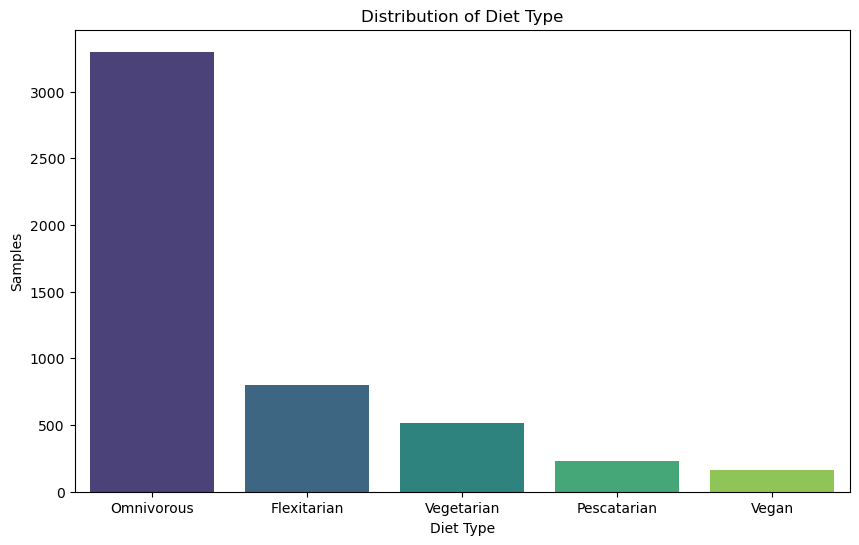

In [24]:
class_counts = dietry_habits_normalized['diet_type'].value_counts()

print("Classes Distribution:\n")
print(class_counts)

plt.figure(figsize = (10, 6))
sns.barplot(x = class_counts.index, y = class_counts.values, palette = 'viridis')
plt.title('Distribution of Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Samples')
plt.show()

__Analysis Performed and Conclusions__

I conducted an analysis to verify if the ```diet_type``` column in the ```dietary_habits_normalized``` dataset is imbalanced. I did this by counting the number of samples for each diet type using the ```value_counts()``` method and visualizing the distribution with a bar plot. The results show significant imbalance in the distribution of diet types. 

Specifically:
- Omnivorous: 3300 samples
- Flexitarian: 803 samples
- Vegetarian: 513 samples
- Pescatarian: 230 samples
- Vegan: 164 samples

This indicates that the majority of samples belong to the "Omnivorous" category, while the "Vegan" and "Pescatarian" categories have the least representation. This type of imbalance can lead to biased model performance, where the model may become biased towards predicting the majority class more accurately than the minority classes.

To address this imbalance, I will apply some resampling technique, like oversampling (e.g., SMOTE - Synthetic Minority Oversampling Technique), to increase the number of samples in the minority classes.

By balancing the dataset, I aim to ensure that the model learns to recognize and predict each class more fairly. This should improve the model's overall performance and accuracy, particularly for the minority classes, leading to more reliable recommendations.

### 4.4. Data Transformation

This part of the project involves data transformation techniques such as Label Encoding, One-Hot Encoding, and Normalization, along with model preparation steps including Cross-Validation and data balancing using SMOTE. The goal is to establish a solid foundation that improves model performance and ensures more accurate predictions.

__1. Label Encoding for the Target Variable__
```Label Encoding``` is a technique used to convert categorical variables into numerical form. In this case, I apply it to the target variable, ```diet_type```, which contains different categories of diet types. ```Label Encoding``` assigns a unique integer to each category, making it easier for machine learning algorithms to interpret the data. For instance, the label encoder will convert diet types like 'Omnivorous', 'Vegetarian', 'Vegan', etc., into numeric values.

This encoding type is prefered for the target variable, instead of ```One-Hot Encoding```, because ```diet_type``` is a categorical variable with distinct classes, and ```Label Encoding``` is more efficient. It assigns a unique integer to each diet type, keeping the dataset smaller and more manageable. Additionally, SMOTE (Synthetic Minority Over-sampling Technique) doesn’t work with One-Hot Encoding because it requires numerical input, so ```Label Encoding``` ensures compatibility with SMOTE. This approach also helps preserve the class distribution, which is important for handling imbalanced classes effectively.

Purpose: To prepare the target variable for model training by converting it into a format that machine learning algorithms can process.

__2. Normalization of Numerical Features__
```Normalization``` is the process of scaling numerical features so that they fall within a specific range, typically between 0 and 1. This is done using ```MinMaxScaler```, which rescales the data by subtracting the minimum value and dividing by the range (max-min). This step ensures that all numerical features have the same scale, which is important because many machine learning algorithms (such as distance-based algorithms like KNN, or gradient-based models) perform better when features are normalized.

Purpose: To standardize the scale of numerical features, ensuring that no feature disproportionately influences the model due to its larger scale.

__3. One-Hot Encoding for Categorical Features__
```One-Hot Encoding``` is applied to categorical features, such as gender, snack frequency, alcohol consumption, and others. This method creates a binary column for each category in the original feature. For example, if the gender feature contains 'Male' and 'Female,' ```One-Hot Encoding``` will generate two new columns: one for 'Male' and another for 'Female,' with 1s and 0s representing the presence or absence of the category in each row.

Purpose: To convert categorical variables into a format that machine learning models can understand, while avoiding the issue of ordinal relationships that might arise with ```Label Encoding```.

__4. Stratified K-Fold Cross-Validation__
```Stratified K-Fold Cross-Validation``` is a variation of the standard K-Fold cross-validation technique used for evaluating machine learning models. It helps improve the model evaluation by ensuring that each fold (split) of the data contains the same proportion of each class as the original dataset, particularly useful for imbalanced datasets.

Purpose: To ensure that each fold of the dataset has a similar distribution of the target variable, resulting in more reliable and generalized model performance.

__5. SMOTE (Synthetic Minority Over-sampling Technique)__
```SMOTE``` is applied to the training set to address class imbalance. The ```SMOTE``` algorithm generates synthetic examples of the minority class by creating new data points based on existing ones. This process helps to balance the class distribution and improve the model’s ability to recognize the minority class, which can often be underrepresented in imbalanced datasets.

```SMOTE``` should __only__ be applied to the __training set__, not the test set. 

This is crucial because:
- The test set represents real-world data and should not be artificially inflated.
- The purpose of the test set is to evaluate the model’s performance on unseen data. If synthetic data is introduced into the test set, it could give an inaccurate assessment of the model’s real-world performance.

Purpose: To tackle class imbalance by creating synthetic examples of the underrepresented classes, leading to more balanced training data and better model performance.

#### 4.4.1. Target Variable Encoding

At first, I separate the features ```(X)``` and the target variable ```(y)```. The target variable is ```diet_type```, which represents the type of diet (such as omnivorous, vegetarian, vegan, etc.). I drop the ```diet_type``` column from the ```dietry_habits_normalized``` dataset and assign it to the variable ```y```. The rest of the columns are stored in ```X``` as the features to be used for model training.

I use ```Label Encoding``` to convert the categorical values of ```diet_type``` into numerical labels. The ```LabelEncoder``` class from scikit-learn is used for this task. The ```fit_transform()``` method is applied to the target variable ```y```, which converts the categorical diet types into numerical labels (e.g., 0 for "Omnivorous", 1 for "Vegetarian", etc.).

The target variable ```diet_type``` was successfully label encoded into five categories with the distribution below:
| Label | Diet Type    | Count | Percentage (%) |
|-------|--------------|-------|----------------|
| 0     | Flexitarian  | 803   | 15.1           |
| 1     | Omnivorous   | 3300  | 62.0           |
| 2     | Pescatarian  | 230   | 4.3            |
| 3     | Vegan        | 164   | 3.1            |
| 4     | Vegetarian   | 513   | 9.6            |

In [28]:
# Separate features and target variable
X = dietry_habits_normalized.drop('diet_type', axis = 1)
y = dietry_habits_normalized['diet_type']

# Label encoding for the target variable ('diet_type')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check the label encoding
print("Label encoded target (diet_type):", label_encoder.classes_)
print("Encoded target values (first 10):", y_encoded[:10])

Label encoded target (diet_type): ['Flexitarian' 'Omnivorous' 'Pescatarian' 'Vegan' 'Vegetarian']
Encoded target values (first 10): [4 0 1 0 1 1 1 1 1 2]


In [29]:
# Count occurrences of each encoded class
class_counts = Counter(y_encoded)

# Display the counts with their corresponding class labels
for label, count in class_counts.items():
    print(f"{label}: {label_encoder.classes_[label]} - {count} samples")

4: Vegetarian - 513 samples
0: Flexitarian - 803 samples
1: Omnivorous - 3300 samples
2: Pescatarian - 230 samples
3: Vegan - 164 samples


#### 4.4.2. Encoding and Scaling 

Here, I define a list of ```categorical features``` that need to be encoded. These features include things like gender, snack frequency, alcohol consumption, and health conditions. These variables are categorical, meaning they represent different categories or labels, and will need to be transformed into a format suitable for machine learning models.

Also I define another list of ```numerical features``` that need to be scaled. These variables represent quantities that can take a wide range of values, such as age, weight, or bmi. For machine learning models to perform better, these numerical features are often scaled to ensure they all have the same range, which helps models converge faster and prevent some variables from dominating others.

The ```ColumnTransformer``` is used to apply different transformations to different subsets of the features. In this case, two types of transformations are applied:

- Numerical features were scaled to a range of [0, 1] using ```MinMaxScaler```, ensuring equal contribution during model training.
- Categorical features were transformed into binary columns using ```OneHotEncoder```, preserving their categorical nature in a machine-readable format.

Both transformations were applied simultaneously using a ```ColumnTransformer```, resulting in a unified preprocessed dataset.

The ```fit_transform()``` method applies both transformations to the data and the result is stored in ```X_transformed```, which contains the transformed feature data, now ready for model training.

A check on the scaled data confirmed the range of numerical features is within [0, 1], validating the transformation.

In [31]:
# OneHotEncoding for categorical features
categorical_cols = ['gender', 'snack_frequency', 'alcohol_consumption', 'food_allergies', 
                    'food_intolerances', 'smoking_status', 'health_condition', 'sleep_quality']

# MinMaxScaler for numerical features
numerical_cols = ['age', 'height_cm', 'weight_kg', 'bmi', 'daily_fruit_intake', 
                  'daily_vegetable_intake', 'daily_meal_count', 'water_intake_l', 
                  'soft_drinks_intake_l', 'daily_coffee_consumption', 'weekly_exercise_frequency']

# Create the preprocessor with transformers for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers = [
        ('num', MinMaxScaler(), numerical_cols),  
        ('cat', OneHotEncoder(), categorical_cols)  
    ])

# Apply the transformations to the data (without fitting)
X_transformed = preprocessor.fit_transform(X)

# Check if the numerical features are scaled (Min-Max scaled)
scaled_data = X_transformed[:, :len(numerical_cols)]  # Extract scaled numerical features
print("Min and Max values for scaled numerical columns:")
print(f"Min values: {scaled_data.min(axis = 0)}")
print(f"Max values: {scaled_data.max(axis = 0)}")

Min and Max values for scaled numerical columns:
Min values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### 4.4.3. Cross-Validation

The dataset is split into 5 folds using ```StratifiedKFold```, ensuring that the class distribution of the target variable remains balanced in each fold. This is especially crucial for handling imbalanced datasets, as it helps prevent bias during model evaluation.

- ```shuffle = True``` shuffles the data before splitting into folds
- ```random_state = 42``` ensures reproducibility by setting a fixed seed for the shuffling.

The cross-validation generator ```(cv.split(X_transformed, y_encoded))``` produces training and test indices for each fold.
Using these indices, the data is split into training ```(X_train_fold, y_train_fold)``` and testing ```(X_test_fold, y_test_fold)``` sets for each fold. The training data is used for model training, and the test data is held out to evaluate the model's performance.

To address class imbalance in the training data, SMOTE is applied to generate synthetic samples for the minority classes. The resampled training set has a balanced class distribution, which reduces the likelihood of the model being biased toward the majority class. Test data is kept untouched to ensure unbiased evaluation.

The result is a resampled training set ```(X_train_res and y_train_res)```, with more samples for the minority classes, making the model less biased toward the majority class.


In [33]:
# Apply StratifiedKFold cross-validation
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Initialize SMOTE
smote = SMOTE(random_state = 42)

# Loop through the cross-validation splits
for fold, (train_index, test_index) in enumerate(cv.split(X_transformed, y_encoded), 1):
    print(f"\n=== Fold {fold} ===")
    
    # Split the data into training and testing sets for the current fold
    X_train_fold, X_test_fold = X_transformed[train_index], X_transformed[test_index]
    y_train_fold, y_test_fold = y_encoded[train_index], y_encoded[test_index]
    
    # Print the distribution of the target variable before SMOTE
    print("\nTraining set distribution (before SMOTE):")
    print(pd.Series(y_train_fold).value_counts())  
    
    print("\nTest set distribution:")
    print(pd.Series(y_test_fold).value_counts())  
    
    # Apply SMOTE to the training data to handle class imbalance
    X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Print the size and distribution of the resampled training data
    print("\nResampled training set distribution (after SMOTE):")
    print(pd.Series(y_train_res).value_counts()) 
    
    # Print the sizes of the datasets
    print(f"\nTraining set size: X_train_fold = {X_train_fold.shape}, y_train_fold = {y_train_fold.shape}")
    print(f"Resampled training set size: X_train_res = {X_train_res.shape}, y_train_res = {y_train_res.shape}")
    print(f"Test set size: X_test_fold = {X_test_fold.shape}, y_test_fold = {y_test_fold.shape}")


=== Fold 1 ===

Training set distribution (before SMOTE):
1    2640
0     642
4     410
2     184
3     132
Name: count, dtype: int64

Test set distribution:
1    660
0    161
4    103
2     46
3     32
Name: count, dtype: int64

Resampled training set distribution (after SMOTE):
4    2640
1    2640
2    2640
0    2640
3    2640
Name: count, dtype: int64

Training set size: X_train_fold = (4008, 48), y_train_fold = (4008,)
Resampled training set size: X_train_res = (13200, 48), y_train_res = (13200,)
Test set size: X_test_fold = (1002, 48), y_test_fold = (1002,)

=== Fold 2 ===

Training set distribution (before SMOTE):
1    2640
0     643
4     410
2     184
3     131
Name: count, dtype: int64

Test set distribution:
1    660
0    160
4    103
2     46
3     33
Name: count, dtype: int64

Resampled training set distribution (after SMOTE):
4    2640
0    2640
1    2640
2    2640
3    2640
Name: count, dtype: int64

Training set size: X_train_fold = (4008, 48), y_train_fold = (4008,)
Re

##### __Explaning the printed results__

1. Training Data Distribution (Before SMOTE)

For each fold, the training set distribution shows an imbalanced class distribution, reflecting the original dataset. Some classes (e.g., 0, 1, 4) have significantly more samples than others (e.g., 2, 3).
This imbalance poses a risk of model bias, where the model may perform well on majority classes but poorly on minority classes due to limited exposure to underrepresented categories.

2. Test Data Distribution

The test set distribution is consistent with the original dataset and remains unchanged throughout the process.
Preserving the test set's original class distribution is crucial to ensure unbiased evaluation. This represents real-world conditions, where data is naturally imbalanced, and helps assess the model's ability to generalize effectively.

3. Resampled Training Data (After SMOTE)

After applying SMOTE to the training data, the class distribution becomes perfectly balanced. Each class (0, 1, 2, 3, 4) has an equal number of samples, as synthetic samples are generated for the minority classes.
This balanced dataset enables the model to learn effectively from all classes, reducing the risk of overfitting to the majority classes and improving performance on underrepresented ones.

4. Dataset Sizes

The training set size before SMOTE reflects the number of original samples in the training split for the current fold.
The resampled training set size after SMOTE shows the increased number of samples (e.g., (13200, 48)) due to synthetic data generation.
The test set size (e.g., (1002, 48)) remains unchanged across all folds, confirming that SMOTE is applied exclusively to the training data.
This ensures that the model is trained on a balanced dataset while being evaluated on the original, imbalanced test data, which provides a realistic measure of its performance in practical applications.


## 5. Model Selection and Methodology

### 5.1. Model Theory

#### 5.1.1 Random Forest

Random Forest is an ensemble learning method that builds multiple decision trees and combines their results to improve prediction performance. It uses a technique called bagging (Bootstrap Aggregation), where each tree is trained on a random subset of the data with replacement, ensuring diversity among the trees. This diversity reduces overfitting and improves generalization.


__How Random Forest Works__

1. Bootstrapping (Sampling with Replacement) - Random Forest uses bagging (Bootstrap Aggregating), which involves creating multiple decision trees by training each tree on a random subset of the training data. These subsets are drawn with replacement, meaning some data points may appear multiple times in the subset while others are left out (these are known as out-of-bag samples).

2. Feature Randomness - In addition to bootstrapping, Random Forest introduces another layer of randomness by selecting a random subset of features at each split of the decision tree. This reduces overfitting, as it prevents trees from becoming too similar to each other.

3. Tree Construction - Each decision tree grows independently without pruning. Trees may grow to their maximum depth or stop when a minimum number of samples per node is reached.

4. Prediction
- Classification: The model aggregates the predictions of all trees, and the final output is determined by a majority vote (the most frequent class).
- Regression: The output is the average prediction of all the trees.

__Advantages of Random Forest__

- Reduces Overfitting: Combining multiple trees reduces the risk of overfitting, as the model generalizes better by averaging predictions.
- Robust to Noisy Data: Random Forest performs well on datasets with noise or missing values by utilizing multiple samples and feature subsets.
- Handles High-Dimensional Data: It can handle large datasets with many features and does not require significant preprocessing.

__Disadvantages of Random Forest__

- Computationally Intensive: Training many trees can be slow, especially for very large datasets.
- Reduced Interpretability: While individual decision trees are interpretable, the combined model (Random Forest) can be challenging to explain.

__Example Applications__

- Customer churn prediction.
- Medical diagnostics (e.g., disease classification).
- Fraud detection.


#### 5.1.2. XGBoost (Extreme Gradient Boosting)
XGBoost is a high-performance gradient boosting algorithm, designed for speed and accuracy. It builds decision trees sequentially, where each new tree attempts to correct the errors (residuals) made by the previous ones. XGBoost incorporates several optimizations to improve its efficiency and performance over traditional gradient boosting methods.

__How XGBoost Works__

1. Boosting Concept - Boosting is an iterative process where multiple weak models (decision trees) are combined to form a strong learner. Each subsequent tree focuses on minimizing the residuals (errors) of the previous trees.

2. Gradient Boosting - XGBoost uses the gradient descent algorithm to optimize the model. The gradient of the loss function is calculated to determine how the model should correct its errors.

3. Tree Construction - Trees are built sequentially, with each tree trained to reduce the residuals left by the previous tree. This process continues until a pre-set number of trees or a stopping criterion is reached.

4. Regularization - XGBoost includes L1 (Lasso) and L2 (Ridge) regularization to penalize model complexity, helping to prevent overfitting.

5. Learning Rate - A learning rate (also called a step size) controls how much each new tree contributes to the overall prediction. A smaller learning rate typically leads to better generalization, though it requires more trees.

6. Parallel Processing - XGBoost implements parallelization for faster computation during tree building, making it efficient for large datasets.

7. Weighted Voting - Each tree’s prediction is weighted based on its performance. Trees that better correct residuals are given higher importance in the final model.

__Advantages of XGBoost__

- High Accuracy: Outperforms many other models on tabular data when properly tuned.
- Regularization: Reduces overfitting through explicit regularization terms (L1, L2).
- Handles Missing Values: Automatically accounts for missing data during training.
- Parallelization: Optimized for speed through multi-threading and hardware acceleration.

__Disadvantages of XGBoost__

- Complexity: Requires careful parameter tuning to achieve optimal performance.
- Computational Costs: More resource-intensive compared to simpler models like Random Forest.
- Overfitting Risk: If not properly regularized or tuned, the model can overfit to the training data.

__Example Applications__

- Predictive modeling in Kaggle competitions.
- Credit scoring and risk assessment.
- Sales forecasting and demand prediction.


#### 5.1.3. Key Differences Between Random Forest and XGBoost:

| Feature                | Random Forest                          | XGBoost                                  |
|------------------------|----------------------------------------|------------------------------------------|
| Ensemble Type          | Bagging (Parallel)                    | Boosting (Sequential)                    |
| Error Handling         | No correction for previous errors     | Iteratively corrects errors by optimizing residuals |
| Performance            | Robust and simple, great for smaller datasets | High performance but needs proper tuning |
| Training               | Parallel tree construction, independent trees | Sequential tree construction, dependent trees |
| Regularization         | Implicitly handled through randomness | Explicit L1 and L2 regularization to prevent overfitting |
| Interpretability       | Easier to interpret as an average of trees | More complex due to residual corrections |
| Computational Cost      |Faster for small datasets   | Slower due to sequential nature|
| Example Use Cases      | Quick, interpretable baseline models   | Large-scale, competitive machine learning tasks |

### 5.2. Evaluation Metrics

Evaluation metrics are quantitative measures used to assess the performance of a machine learning model. They provide insight into how well a model is making predictions, help compare different models, and identify areas for improvement. The choice of metrics depends on the type of problem (e.g., classification, regression) and the specific goals of the analysis. For example, in an imbalanced dataset, metrics like ```accuracy``` may not provide meaningful insights, and alternative metrics like ```precision```, ```recall```, or ```F1-score``` become crucial.

#### 5.2.1. Classification report

A classification report is a comprehensive summary of key evaluation metrics used to assess a classification model's performance. It provides insights into how well the model predicts each class and includes metrics such as precision, recall, F1-score, and support. Here's a detailed explanation of each component:

__1. Precision__

Precision measures how accurate the model’s positive predictions are. It answers the question: _"Of all the samples predicted as positive, how many were actually positive?"_

Formula:
$$\text{Precision} = \frac{TP}{TP + FP}$$

Where:

- $\text{TP}$ = True Positives (correctly predicted positives)
- $\text{FP}$ = False Positives (incorrectly predicted positives)

Example: In spam detection, precision indicates how many of the emails flagged as spam were genuinely spam.
   
__2. Recall__

Recall measures the model's ability to capture all the actual positive instances. It answers the question: _"Of all the actual positives, how many did the model correctly identify?"_

Formula:
$$\text{Recall} = \frac{TP}{TP + FN}$$

Where:

- $\text{TP}$ = True Positives
- $\text{FN}$ = False Negatives (missed positives)

Example: In the same spam detection scenario, recall measures how many spam emails were correctly flagged out of all spam emails.
 
__3. F1-Score:__ 

The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that accounts for both false positives and false negatives, making it especially useful for imbalanced datasets.

Formula:
$$\text{F1-Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Example: In medical diagnosis, the F1-score balances identifying all sick patients (recall) with ensuring the predictions are accurate (precision).

#### 5.2.2. Additional Metrics

The metrics below are especially useful in multiclass classification scenarios, particularly when the dataset is imbalanced, as they help provide a more nuanced view of model performance than simple accuracy alone.

| **Metric**            | **What it Measures**                                                                                      | **When to Use**                                                           |
|-----------------------|-----------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Balanced Accuracy**  |Average recall for each class, giving equal weight to each class.      | Use in imbalanced datasets to avoid bias toward the majority class. |
| **F1-macro**           |Average F1 score across all classes, treating each class equally. | Use when equal performance for all classes is desired. |
| **Weighted F1-score**  | F1 score weighted by class size, prioritizing larger classes.                              | Use when overall performance is prioritized, especially in imbalanced datasets. |

__1. Balanced Accuracy__

Balanced accuracy calculates the average recall across all classes, ensuring fair treatment for each class, regardless of size.


Formula:
$$\text{Balanced Accuracy} = \frac{1}{C} \sum_{i=1}^{C} \text{Recall}_i$$

Where:

- $C$ = Number of classes
- $\text{Recall}_i$ = Recall for class $i$

Example: In a medical dataset where 90% of samples are healthy, traditional accuracy may favor predicting all as healthy. Balanced accuracy adjusts for this imbalance, ensuring the minority class (sick patients) is also considered.

__2. F1-macro__

F1-macro is the average F1-score across all classes. It treats each class equally, regardless of size, and is particularly useful in multiclass classification.

Formula:
$$\text{F1-macro} = \frac{1}{C} \sum_{i=1}^{C} \frac{2 \times \text{Precision}_i \times \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}$$

Where:

- $C$ = Number of classes
- $\text{Precision}_i$ and $\text{Recall}_i$ = Precision and recall for class $i$

Example: In a task with rare classes, F1-macro ensures that the model's performance on minority classes is given equal weight.

__3. Weighted F1-score__

The weighted F1-score averages F1-scores across all classes, weighting each by its size in the dataset.

Formula:

$$\text{Weighted F1-score} = \sum_{i=1}^{C} \left( \frac{n_i}{N} \right) \times \frac{2 \times \text{Precision}_i \times \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}$$

Where:

- $n_i$ = Number of true instances in class
- $N$ = Total number of instances

Example: In a dataset where some classes dominate, the weighted F1-score reflects the model's overall performance, emphasizing larger classes.

#### 5.2.3. ROC Curve and AUC

__1. ROC Curve (Receiver Operating Characteristic)__
- Definition: A graph plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds.
- Purpose: Illustrates the trade-off between sensitivity (recall) and specificity.
- Interpretation: A curve closer to the top-left corner indicates better performance.

__2. AUC (Area Under the Curve)__
- Definition: A single value summarizing the ROC curve's performance.
- Range:
  - AUC = 0.5: No discrimination (random guessing).
  - AUC = 1.0: Perfect classifier.
- Purpose: Provides a threshold-independent measure of model performance, especially useful for imbalanced datasets.
- Example: In fraud detection, AUC helps assess how well the model separates fraudulent and non-fraudulent transactions.

## 6. Model Traning and Evaluation

### 6.1. Random Forest

#### 6.1.1. Training and evaluating the Random Forest Model (Basic parameters)

The ```Random Forest model``` is trained on the ```SMOTE-resampled data```, which helps mitigate the class imbalance problem.
Predictions are made on the test set, which was not used for training, and a classification report is generated to evaluate the model's performance.
This process helps determine the model's strengths and weaknesses in handling different classes, and the classification report provides a comprehensive view of the model's accuracy, precision, recall, and F1-score for each class.

In this step, the ```RandomForestClassifier``` model is trained on the resampled training data ```(X_train_res and y_train_res)```. These features and target variables have been balanced using SMOTE, addressing class imbalance in the dataset.
The ```random_state = 42``` ensures that the results are reproducible by using the same seed for the random number generator each time the model is trained.

After training, the model is used to make predictions ```(y_pred)``` on the test set ```(X_test_fold)```. This set was not used during the training process, allowing us to evaluate the model's generalization ability.
The predicted target values ```(y_pred)``` are compared to the actual test labels ```(y_test_fold)``` to assess the model's performance.

In [54]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)

# Train the RandomForest model after applying SMOTE
rf_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_fold)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test_fold, y_pred))
print(f"Accuracy: {accuracy_score(y_test_fold, y_pred)}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_fold, y_pred)}")
print(f"F1-macro: {f1_score(y_test_fold, y_pred, average = 'macro')}")
print(f"F1-weighted: {f1_score(y_test_fold, y_pred, average = 'weighted')}")


Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.05      0.08       161
           1       0.66      0.96      0.78       660
           2       0.50      0.02      0.04        46
           3       0.00      0.00      0.00        33
           4       0.08      0.01      0.02       102

    accuracy                           0.64      1002
   macro avg       0.30      0.21      0.19      1002
weighted avg       0.51      0.64      0.53      1002

Accuracy: 0.6427145708582834
Balanced Accuracy: 0.2083677107206519
F1-macro: 0.1855267250340355
F1-weighted: 0.5339963457827888


##### __Results and Conclusion__

The Random Forest model demonstrated moderate performance with an overall accuracy of 64%, primarily driven by strong recall (0.96) for the dominant class (Class 1). However, the model struggled significantly with minority classes, as evidenced by a low macro F1-score (0.19) and poor balanced accuracy (0.2084). Class 3 was particularly problematic, with no correctly predicted instances, and Class 0 and 4 also showed very low precision and recall. Despite applying SMOTE to address class imbalance, the model's ability to generalize across all classes remained limited.

To improve the model, the next steps include hyperparameter tuning to optimize the Random Forest's decision boundaries and experimenting with alternative algorithms like XGBoost, which may better handle class imbalance and minority class predictions. Additionally, advanced techniques like class weighting and more sophisticated sampling methods could further enhance performance for underrepresented classes.

#### 6.1.2. Hyperparameter Tuning with GridSeachCV

Hyperparameter tuning helps find the best parameters for the Random Forest model, which can improve performance significantly. We will use __GridSearchCV__ to find the optimal set of hyperparameters by searching through a specified parameter grid.

__GridSearchCV__ is a technique for finding the optimal parameter values from a given set of parameters in a grid. It’s essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.


I define a ```param_grid``` dictionary, where the keys are the hyperparameters of the RandomForest model, and the values are lists of possible values for each hyperparameter. The __GridSearchCV__ will evaluate each combination of these values to find the best-performing one.
- ```n_estimators:```  Determines the number of trees, which directly impacts the model's complexity and training time. A higher value can improve performance but may lead to overfitting if not tuned correctly.
- ```max_depth:``` Maximum depth of each tree.
- ```min_samples_split:``` Minimum number of samples required to split a node.
- ```min_samples_leaf:``` Minimum number of samples required to be at a leaf node.
- ```max_features:``` The number of features to consider when splitting a node (could be all, the square root, or the logarithm of the number of features).
- ```class_weight:``` This helps address class imbalance by assigning more weight to the minority class (e.g., using 'balanced').

After that is time to initialize __GridSearchCV__, passing:
- ```estimator = rf_model:``` The model to be tuned.
- ```param_grid = param_grid:``` The grid of hyperparameters to search.
- ```cv = 3:``` 3-fold cross-validation. The dataset will be split into 3 parts, and the model will be trained on 2 parts and tested on the remaining part. This process is repeated 3 times to get a more reliable estimate of the model's performance.
- ```n_jobs = -1:``` Use all available processors to speed up the grid search.
- ```verbose = 2:``` Print detailed logs during the search process.
- ```scoring = 'balanced_accuracy':``` Calculates the average recall for each class and accounts for class imbalance

After that ```rid_search.fit(X_train_res, y_train_res)``` starts the process of hyperparameter optimization by performing cross-validation on the training set (which has already been balanced using SMOTE). It will test all possible combinations of the hyperparameters and evaluate the best configuration.

Once the search completes, we can obtain the results:
- ```grid_search.best_params_:``` The best hyperparameter values that led to the highest accuracy.
- ```grid_search.best_score_:``` The best result from the cross-validation (the highest accuracy score).
- ```best_rf_model = grid_search.best_estimator_:``` Retrieves the best model trained with the optimized hyperparameters.

__Model Evaluation__

After obtaining the best model, we use it to make predictions on the test set:
- ```y_pred = best_rf_model.predict(X_test_fold):``` Make predictions on the test set.
- ```classification_report(y_test_fold, y_pred):``` Prints the classification report, which shows important metrics like precision, recall, F1-score, and support for each class.

The best model is evaluated on the test set (X_test_fold) using various classification metrics. ```Balanced accuracy``` and ```F1-macro``` are crucial for evaluating performance on minority classes, ensuring that the model does not overly favor the majority class.

In [44]:
# Set the parameters
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt', 'log2'],  
    'class_weight': ['balanced', None]  
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2, scoring = 'balanced_accuracy')

# Train the model
rf_grid_search.fit(X_train_res, y_train_res)
print("Best parameters found:", rf_grid_search.best_params_)
print("Best score:", rf_grid_search.best_score_)

# Make predictions using the best model
best_rf_model = rf_grid_search.best_estimator_  
y_pred = best_rf_model.predict(X_test_fold)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test_fold, y_pred))
print(f"Accuracy: {accuracy_score(y_test_fold, y_pred)}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_fold, y_pred)}")
print(f"F1-macro: {f1_score(y_test_fold, y_pred, average = 'macro')}")
print(f"F1-weighted: {f1_score(y_test_fold, y_pred, average = 'weighted')}")

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters found: {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9193939393939394

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.04      0.07       161
           1       0.67      0.98      0.79       660
           2       0.50      0.02      0.04        46
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00       102

    accuracy                           0.65      1002
   macro avg       0.31      0.21      0.18      1002
weighted avg       0.53      0.65      0.53      1002

Accuracy: 0.6506986027944112
Balanced Accuracy: 0.20725578769057035
F1-macro: 0.18034907081868407
F1-weighted: 0.5344769192570826


##### __Results and Conclusion__

The tuned Random Forest model, with optimized hyperparameters, showed a slightly improvement in accuracy (65%) and a higher recall for Class 1 (0.98). However, it still struggled with minority classes, particularly Classes 3 and 4, where no correct predictions were made. Despite these improvements, the model continued to show low performance across underrepresented classes, reflected in the poor macro F1-score (0.18) and balanced accuracy (0.21). 

The next steps should focus on fine-tuning the model further, exploring alternative algorithms like XGBoost, and incorporating advanced techniques such as class weighting and more targeted sampling to better address the class imbalance.

#### 6.1.3. ROC Curves for Random Forest Models

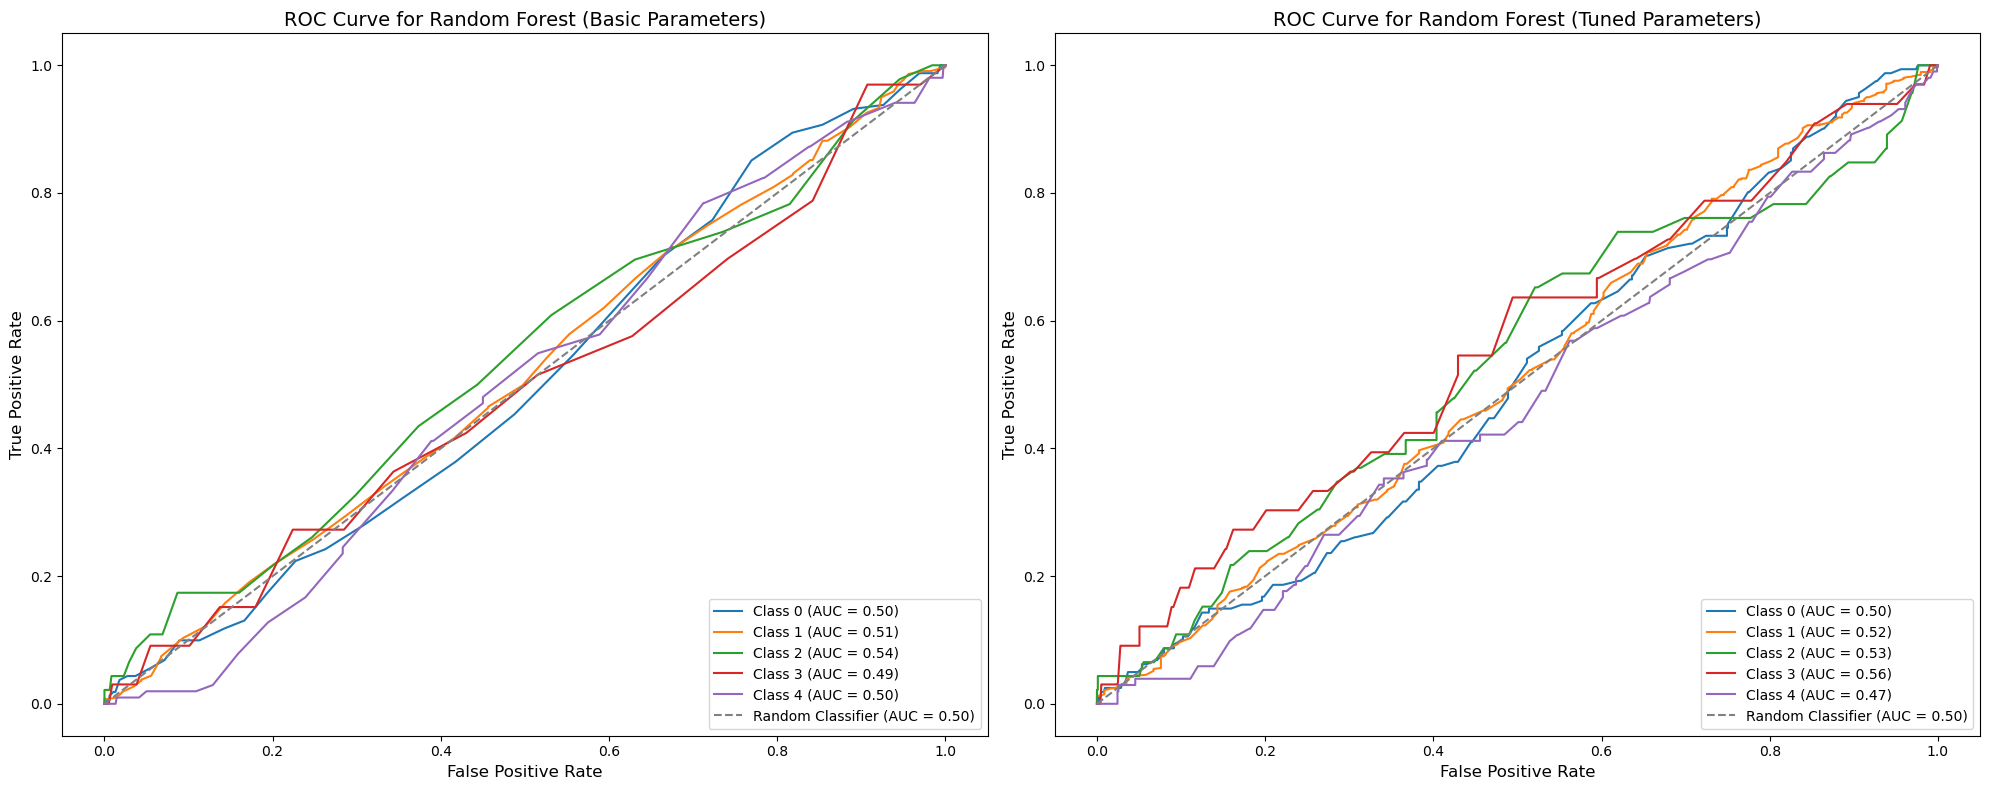

In [56]:
# Binarize the true labels for multi-class classification
y_test_bin = label_binarize(y_test_fold, classes=[0, 1, 2, 3, 4])  # Adjust classes based on your data

# Predicted probabilities for basic RandomForest
y_pred_proba_basic = rf_model.predict_proba(X_test_fold)

# Predicted probabilities for GridSearchCV-tuned RandomForest
y_pred_proba_tuned = best_rf_model.predict_proba(X_test_fold)

# Create a 1x2 subplot layout
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot ROC curve for the basic RandomForest model
axs[0].set_title('ROC Curve for Random Forest (Basic Parameters)', fontsize=14)
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_basic[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.50)')
axs[0].set_xlabel('False Positive Rate', fontsize=12)
axs[0].set_ylabel('True Positive Rate', fontsize=12)
axs[0].legend(loc='lower right')

# Plot ROC curve for the tuned RandomForest model
axs[1].set_title('ROC Curve for Random Forest (Tuned Parameters)', fontsize=14)
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_tuned[:, i])
    roc_auc = auc(fpr, tpr)
    axs[1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.50)')
axs[1].set_xlabel('False Positive Rate', fontsize=12)
axs[1].set_ylabel('True Positive Rate', fontsize=12)
axs[1].legend(loc='lower right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


The graphics show the ```Receiver Operating Characteristic (ROC)``` curves for a Random Forest classifier before and after hyperparameter tuning:

__Basic Model:__ The AUC values for the basic model range between 0.49 and 0.54 across the classes, indicating a poor ability to distinguish between classes.
The ROC curves are close to the diagonal (random classifier), showing minimal predictive power.

__Tuned Model:__ The tuned model shows minor improvements, with AUC values reaching up to 0.56 for some classes. However, these remain close to 0.5, reflecting limited enhancement in classification performance.
The curves still hover near the random classifier line, suggesting the model struggles with class separation even after tuning.
Overall, both models perform poorly, with the tuned model showing slight but insufficient improvement. The results highlight challenges in class differentiation, possibly due to data imbalance or feature limitations.

#### 6.1.4. Final Results and Conclusion on Random Forest Models

From the comparison table, we can draw several important observations:


| **Model**                                 | **Accuracy** | **Balanced Accuracy** | **F1-macro** | **Weighted F1-score** |
|-------------------------------------------|--------------|-----------------------|--------------|-----------------------|
| **Random Forest (Basic Model)**           | 64%          | 20.8%                 | 0.1855       | 0.534                 |
| **Random Forest (Grid Search Model)**     | 65%          | 20.7%                 | 0.18         | 0.534                 |



__Conclusion__

The ```GridSearch Model``` shows a slight improvement in accuracy (from 0.64 to 0.65) and a marginal improvement in Class 1 recall (from 0.96 to 0.98). However, the overall performance remains almost identical in terms of ```F1-macro```, ```weighted F1-score```, and ```balanced accuracy```.
Class 0 precision improved slightly after hyperparameter tuning, but recall for minority classes (Class 3 and Class 4) remains poor, reflecting persistent challenges with class imbalance.

Both models show limited ability to differentiate between the classes, with AUC values close to 0.5, which suggests that both models are essentially performing similarly, with very little improvement in predictive power even after hyperparameter tuning. While the ```Grid Search Model``` has a slight improvement in accuracy and AUC values, the overall performance is still poor, indicating the need for further model optimization or exploring alternative algorithms like XGBoost for better performance on the dataset.

Given the minimal improvement between the basic and tuned models, the difference is not substantial, but the ```GridSearch Model``` offers a slightly more optimized performance.

__Next Steps__

Proceed with experimenting with XGBoost, which may provide better results, especially with class imbalance handling and feature complexity.

### 6.2. XGBoost

#### 6.2.1. Traning and Evaluation the XGBoost (with Basic Parameters)

The ```XGBoost Classifier``` is trained on the SMOTE-resampled training data ```(X_train_res and y_train_res)```, which balances the dataset and addresses class imbalance. The ```random_state = 42``` ensures reproducibility by setting a consistent random seed.

After training, the model makes predictions ```(y_pred)``` on the test set ```(X_test_fold)```, which was kept separate during training. This ensures the evaluation reflects the model's ability to generalize to unseen data.

The predictions are compared to the actual labels ```(y_test_fold)```, and a classification report is generated to assess performance. This report provides key metrics, including accuracy, precision, recall, and F1-scores for each class, offering a detailed understanding of the model's strengths and weaknesses.

In [92]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    random_state = 42,
    scale_pos_weight = 1,  # Adjusted based on the class imbalance
    use_label_encoder = False,  # To avoid label encoder warning
    eval_metric = 'mlogloss'  # For multi-class classification
)

# Train the model
xgb_model.fit(X_train_res, y_train_res)

# Make predictions
y_pred = xgb_model.predict(X_test_fold)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test_fold, y_pred))
print(f"Accuracy: {accuracy_score(y_test_fold, y_pred)}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_fold, y_pred)}")
print(f"F1-macro: {f1_score(y_test_fold, y_pred, average = 'macro')}")
print(f"F1-weighted: {f1_score(y_test_fold, y_pred, average = 'weighted')}")


Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.04      0.07       161
           1       0.67      0.96      0.79       660
           2       0.33      0.02      0.04        46
           3       0.00      0.00      0.00        33
           4       0.06      0.01      0.02       102

    accuracy                           0.64      1002
   macro avg       0.25      0.21      0.18      1002
weighted avg       0.49      0.64      0.53      1002

Accuracy: 0.6387225548902196
Balanced Accuracy: 0.20621638378671628
F1-macro: 0.1831141399766233
F1-weighted: 0.5330237489096008


##### __Results and conclusion__

The results indicate that the model performs well for the majority class (Class 1), achieving a high precision (0.67), recall (0.96), and F1-score (0.79). However, it struggles significantly with the minority classes (0, 2, 3, 4), where both precision and recall are extremely low, with some F1-scores dropping to 0.00. This highlights the model's inability to generalize to less frequent categories.

While the overall accuracy is 64%, the balanced accuracy is just 21%, emphasizing the disparity in performance across classes. The F1-macro score (0.18) confirms that the model is not effectively predicting minority classes. Weighted F1-score is slightly better (0.53) due to the dominance of Class 1, which has the highest support (660 samples). Addressing this imbalance is essential to improve model performance on underrepresented classes.

The next step is to perform hyperparameter tuning using ```Random Search``` and ```Grid Search``` to optimize the XGBoost model and address these shortcomings.

#### 6.2.2. Hyperparameter Tuning with Random Search

This code performs hyperparameter tuning using ```RandomizedSearchCV``` for an XGBoost classifier (XGBClassifier) to optimize its performance. It is a technique for hyperparameter optimization. Instead of testing every possible combination of hyperparameters (which could be computationally expensive), ```RandomizedSearchCV``` randomly samples a specified number of parameter settings from a defined grid. It evaluates these settings using cross-validation, selecting the best-performing combination.

__1. Hyperparameter Grid__ 

A dictionary param_grid defines various hyperparameters for the XGBoost model, such as:

- ```n_estimators:``` Determines the number of trees, which directly impacts the model's complexity and training time. A higher value can improve performance but may lead to overfitting if not tuned correctly.
- ```max_depth:``` Maximum depth of a tree.
- ```learning_rate:``` Step size used to update weights in each iteration.
- ```subsample:``` Fraction of training samples used to build each tree.
- ```colsample_bytree:``` Fraction of features to sample per tree.
- ```gamma:``` Minimum loss reduction required for a split.
- ```scale_pos_weight:``` A parameter to balance class weights.

__2. RandomizedSearchCV__

```RandomizedSearchCV``` is used to randomly search over a defined parameter grid to find the best hyperparameters.
It performs ```n_iter``` (50 in this case) random combinations of hyperparameter values, and each combination is evaluated using ```cross-validation (cv = 3)```.
```n_jobs = -1``` allows the search to run in parallel, making it faster by utilizing all available CPU cores.
```scoring ='balanced_accuracy'``` calculates the average recall for each class and accounts for class imbalance.

__3. Model Training__

The ```RandomizedSearchCV``` object is fitted to the resampled training data ```(X_train_res, y_train_res)```.

__3. Best Hyperparameters__

Once the search is completed, the best combination of hyperparameters ```(best_params_)``` is printed, along with the best score ```(best_score_)``` achieved during cross-validation. The selected parameters optimize the balance between learning rate and tree depth, improving accuracy and generalization.

__4. Model Evaluation__

The best model ```(best_xgb_model)``` is evaluated on the test set (X_test_fold) using various classification metrics. ```Balanced accuracy``` and ```F1-macro``` are crucial for evaluating performance on minority classes, ensuring that the model does not overly favor the majority class.

In [68]:
# Set the parameters for the XGBoost model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 3]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state = 42)

# Initialize RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(estimator = xgb_model, param_distributions = param_grid, n_iter = 50, 
                                   cv = 3, n_jobs = -1, verbose = 2, scoring = 'balanced_accuracy', random_state = 42)

# Train the model
xgb_random_search.fit(X_train_res, y_train_res)
print("\nBest parameters found: ", xgb_random_search.best_params_)
print("Best Score:", xgb_random_search.best_score_)

# Make predictions using the best model
best_xgb_random_model = xgb_random_search.best_estimator_
y_pred = best_xgb_random_model.predict(X_test_fold)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test_fold, y_pred))
print(f"Accuracy: {accuracy_score(y_test_fold, y_pred)}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_fold, y_pred)}")
print(f"F1-macro: {f1_score(y_test_fold, y_pred, average = 'macro')}")
print(f"F1-weighted: {f1_score(y_test_fold, y_pred, average = 'weighted')}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best parameters found:  {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best Score: 0.870530303030303

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.02      0.03       161
           1       0.66      0.99      0.79       660
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00       102

    accuracy                           0.65      1002
   macro avg       0.18      0.20      0.17      1002
weighted avg       0.47      0.65      0.53      1002

Accuracy: 0.653692614770459
Balanced Accuracy: 0.20130246565029175
F1-macro: 0.16563057485256155
F1-weighted: 0.5283173657302684


##### __Results and conclusion__

The tuned XGBoost model shows only marginal improvements compared to the basic model, with both models still facing significant challenges related to class imbalance. The tuned model achieved an accuracy of 65.37%, which is a slight increase from the basic model's accuracy of 63.87%. However, the overall performance remains unsatisfactory for the minority classes.

The balanced accuracy for the tuned model is 20.13%, which is slightly worse than the basic model's balanced accuracy of 20.62%. This indicates that despite hyperparameter tuning, the model is still heavily biased towards the majority class (Class 1), where it performs well (precision: 0.66, recall: 0.99, F1-score: 0.79). For the minority classes (0, 2, 3, and 4), the model continues to struggle, with F1-scores of 0.00 for most classes, reflecting its inability to generalize to these underrepresented categories.

The F1-macro score of 0.17 and F1-weighted score of 0.53 show that the model is not effectively capturing the performance across all classes. While hyperparameter tuning slightly improved the weighted F1-score, it did not address the core issue of class imbalance.

#### 6.2.3. Hyperparameter Tuning with Grid Seach

This code performs hyperparameter tuning using ```GridSearchCV``` for an XGBoost classifier (XGBClassifier) to optimize its performance.
It is a hyperparameter tuning technique used in machine learning to find the best combination of hyperparameters for a given model. It performs an exhaustive search over a specified parameter grid, where it evaluates all combinations of the parameters by training and evaluating the model using cross-validation.

__1. Parameter Grid (param_grid):__

The param_grid is a dictionary containing the hyperparameters to be tuned. The values specified are potential candidates for each parameter:

- ```n_estimators:``` The number of boosting rounds (trees) in the model, tested with values 150 and 200.
- ```max_depth:``` The maximum depth of a tree, tested with values 8 and 10.
- ```learning_rate:``` The step size shrinkage used to prevent overfitting, tested with 0.05 and 0.1.
- ```subsample:``` The fraction of training samples used for fitting, tested with values 0.8 and 0.9.
- ```colsample_bytree:``` The fraction of features used for each tree, tested with 0.9.
- ```gamma:``` Regularization parameter that controls complexity, tested with 0.1.
- ```scale_pos_weight:``` Used to address class imbalance, set to 1.

__2. XGBoost Classifier (XGBClassifier)__

The XGBClassifier is initialized with a fixed ```random_state``` for reproducibility.

__3. GridSearchCV__

- ```GridSearchCV``` is used to perform an exhaustive search over the specified parameter grid. The code will test all combinations of the parameters in param_grid.
- ```cv = 3``` means 3-fold cross-validation will be used to evaluate each combination of parameters.
- ```n_jobs = -1``` allows for parallel computation, using all available cores to speed up the process.
```scoring ='balanced_accuracy'``` calculates the average recall for each class and accounts for class imbalance.

__4. Model Training__

- ```grid_search.fit(X_train_res, y_train_res)``` runs the grid search process, training the model with each combination of hyperparameters on the resampled (SMOTE-applied) training data.

__5. Best Hyperparameters and Results__

After fitting, the code prints the best parameters found ```(grid_search.best_params_)``` and the corresponding best score ```(grid_search.best_score_)```, which is the highest accuracy obtained during cross-validation.

__6. Performance Evaluation__

The best model ```(grid_search.best_estimator_)``` is evaluated on the test set (X_test_fold) using various classification metrics. ```Balanced accuracy``` and ```F1-macro``` are crucial for evaluating performance on minority classes, ensuring that the model does not overly favor the majority class.

In [78]:
# Set a refined parameter grid for the XGBoost model
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [8, 10],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.9],
    'gamma': [0.1],
    'scale_pos_weight': [1]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state = 42)

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, scoring = 'balanced_accuracy')

# Train the model
xgb_grid_search.fit(X_train_res, y_train_res)
print("\nBest parameters found: ", xgb_grid_search.best_params_)
print("Best Score:", xgb_grid_search.best_score_)

# Make predictions using the best model
best_xgb_grid_model = xgb_grid_search.best_estimator_
y_pred = best_xgb_grid_model.predict(X_test_fold)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test_fold, y_pred))
print(f"Accuracy: {accuracy_score(y_test_fold, y_pred)}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_fold, y_pred)}")
print(f"F1-macro: {f1_score(y_test_fold, y_pred, average = 'macro')}")
print(f"F1-weighted: {f1_score(y_test_fold, y_pred, average = 'weighted')}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best parameters found:  {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
Best Score: 0.8722727272727274

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.01      0.02       161
           1       0.66      0.99      0.79       660
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00       102

    accuracy                           0.65      1002
   macro avg       0.17      0.20      0.16      1002
weighted avg       0.47      0.65      0.52      1002

Accuracy: 0.6516966067864272
Balanced Accuracy: 0.1997571993224167
F1-macro: 0.16288006366665958
F1-weighted: 0.5247821312176583


##### __Results and conclusion__

The second round of hyperparameter tuning using ```Grid Search``` has yielded some improvements, but the performance remains similar to the previous tuning attempts. The accuracy is 65.17%, a slight decrease from the previous tuned model's 65.37%. However, this still does not reflect a significant breakthrough in terms of overall model performance, particularly in addressing the class imbalance issue.

The balanced accuracy of 19.98% is almost identical to the previous result of 20.13%, further emphasizing the model's inability to effectively classify minority classes. While the model performs very well on the majority class (Class 1), with high precision (0.66), recall (0.99), and F1-score (0.79), it struggles with the minority classes (0, 2, 3, and 4), where the precision and recall are almost zero, resulting in an F1-score of 0.00 for most of the minority classes.

The macro F1-score (0.16) and the weighted F1-score (0.52) confirm that, despite the hyperparameter adjustments, the model continues to be heavily biased towards the majority class. These results suggest that further adjustments, such as using techniques to handle class imbalance (e.g., SMOTE, class weighting), or exploring different models, might be necessary to improve performance on the underrepresented classes.

In conclusion, while ```Grid Search``` has slightly improved the model's overall accuracy, it has not solved the underlying issue of imbalance.

#### 6.2.4. ROC curve for XGBoost Models

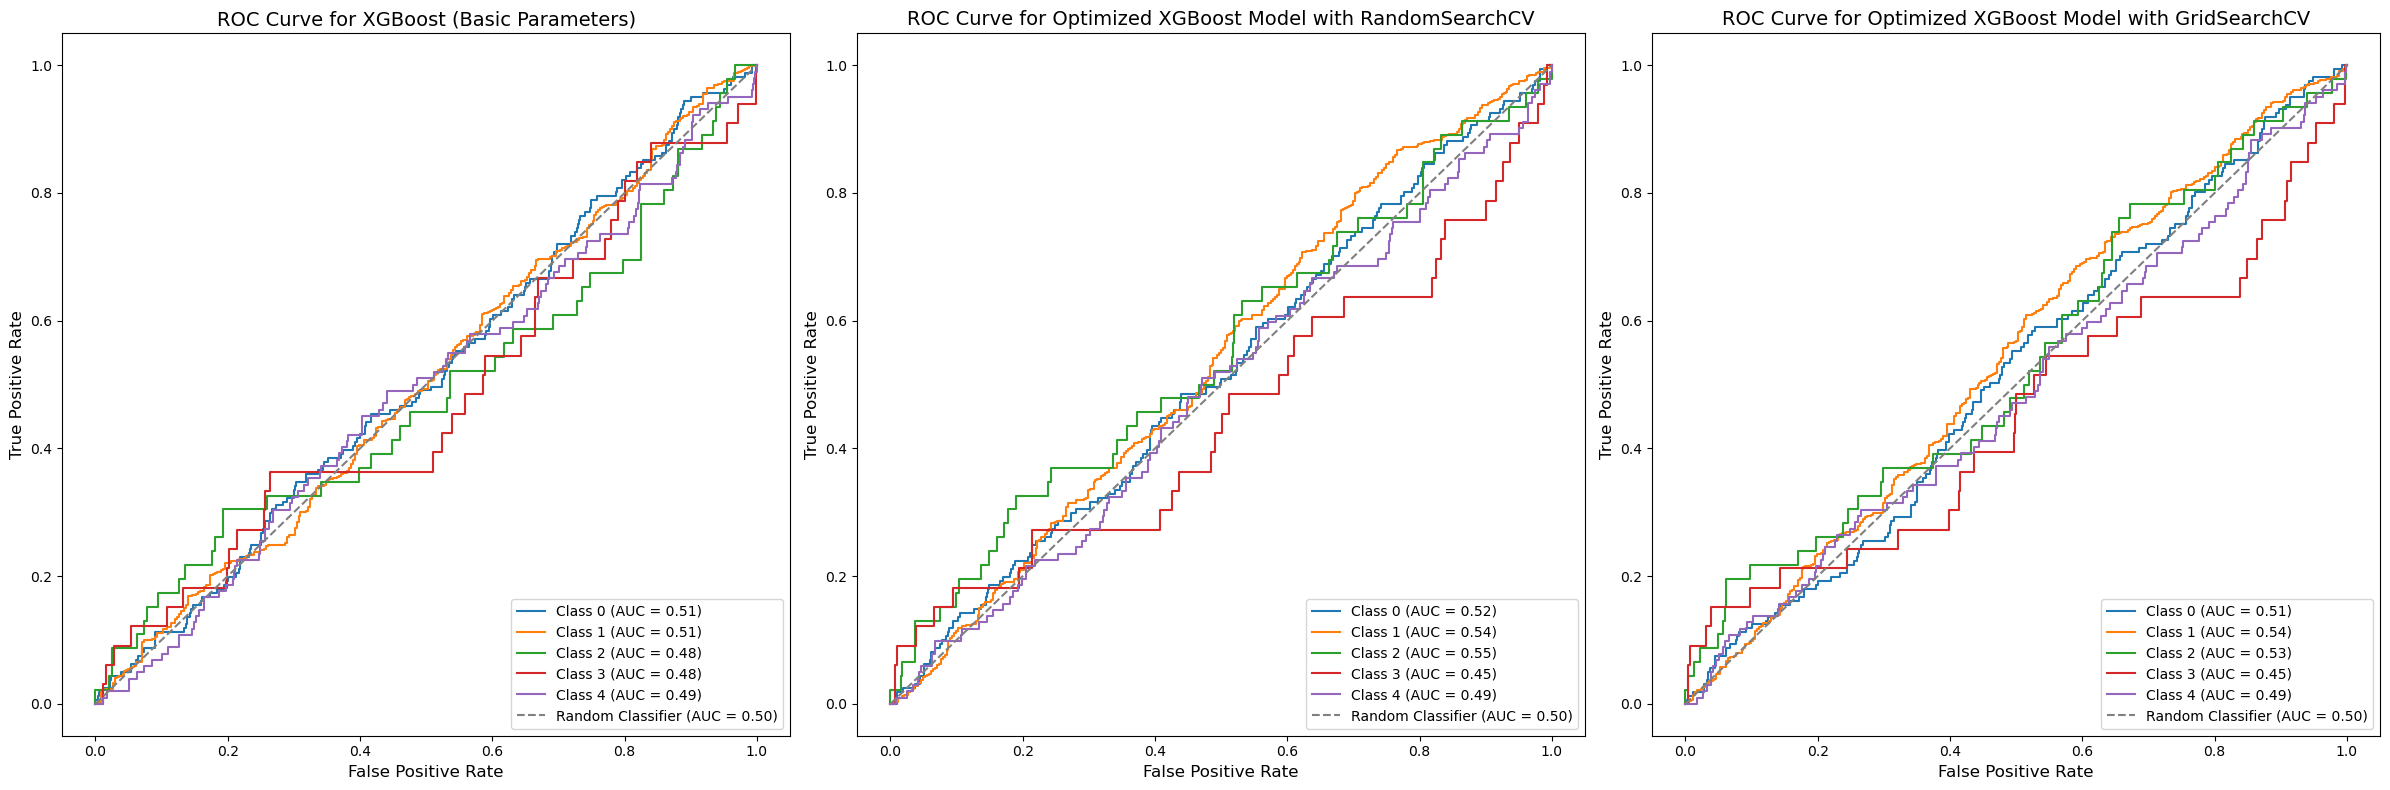

In [94]:
# Binarize the labels for multi-class ROC curve (necessary for multi-class classification)
y_test_bin = label_binarize(y_test_fold, classes=[0, 1, 2, 3, 4])

# Predict probabilities for the basic XGBoost
y_pred_proba_basic = xgb_model.predict_proba(X_test_fold)

# Predict probabilities for the best XGBoost model from random search
y_pred_proba_random = best_xgb_random_model.predict_proba(X_test_fold)

# Predict probabilities for the best XGBoost model from GridSearchCV
y_pred_proba_grid = best_xgb_grid_model.predict_proba(X_test_fold)

# Create a 1x3 subplot layout
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# ROC Curve for XGBoost (Basic Parameters)
axs[0].set_title('ROC Curve for XGBoost (Basic Parameters)', fontsize=14)
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_basic[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.50)')
axs[0].set_xlabel('False Positive Rate', fontsize=12)
axs[0].set_ylabel('True Positive Rate', fontsize=12)
axs[0].legend(loc='lower right')

# ROC Curve for XGBoost (Optimized)
axs[1].set_title('ROC Curve for Optimized XGBoost Model with RandomSearchCV', fontsize=14)
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_random[:, i])
    roc_auc = auc(fpr, tpr)
    axs[1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.50)')
axs[1].set_xlabel('False Positive Rate', fontsize=12)
axs[1].set_ylabel('True Positive Rate', fontsize=12)
axs[1].legend(loc='lower right')

# ROC Curve for XGBoost (GridSearchCV)
axs[2].set_title('ROC Curve for Optimized XGBoost Model with GridSearchCV', fontsize=14)
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_grid[:, i])
    roc_auc = auc(fpr, tpr)
    axs[2].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
axs[2].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.50)')
axs[2].set_xlabel('False Positive Rate', fontsize=12)
axs[2].set_ylabel('True Positive Rate', fontsize=12)
axs[2].legend(loc='lower right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The graphics display the ```Receiver Operating Characteristic (ROC)``` curves for three XGBoost models.

__Basic Model__

- The AUC values for the basic model range from 0.48 to 0.51 across the different classes. These values indicate a weak ability to distinguish between the classes.
- The ROC curves are nearly aligned with the diagonal (random classifier), which suggests that the basic model struggles to separate the classes effectively. The model shows minimal predictive power.

__Optimized Model with RandomizedSearchCV__

- The RandomizedSearchCV-optimized model shows a slight improvement in AUC values, with the AUC for some classes reaching up to 0.55. However, for other classes (such as Class 3 and Class 4), the AUC remains low, reflecting limited improvements.
- The ROC curves are still somewhat close to the diagonal, which indicates that the model has not made significant strides in improving class separation, despite the hyperparameter tuning.

__Optimized Model with GridSearchCV__

- The GridSearchCV-optimized model shows similar trends to the RandomizedSearchCV model, with AUC values ranging from 0.49 to 0.54 across the classes.
- The ROC curves still hover near the diagonal, indicating that the model has not sufficiently improved in distinguishing between the classes.

#### 6.2.5. Final Results and Conclusion on XGBoost Models

In this experiment, we evaluated three hyperparameter optimization techniques: Baseline Model, Randomized Search, and Grid Search. Each model was assessed based on key performance metrics, including accuracy, balanced accuracy, macro and weighted F1 scores.

__Comparison Table of Key Metrics:__

| Model                          | Accuracy  | Balanced Accuracy | F1-macro  | Weighted F1-score |
|--------------------------------|-----------|-------------------|-----------|-------------------|
| **XGBoost (Basic Model)**      | 63.87%    | 20.62%            | 0.18      | 0.53              |
| **XGBoost (Randomized Search)**| 65.37%    | 20.13%            | 0.17      | 0.53              |
| **XGBoost (Grid Search)**      | 65.17%    | 19.98%            | 0.16      | 0.52              |

__Conclusion__

The hyperparameter optimization techniques, including ```Randomized Search``` and ```Grid Search```, led to only minor improvements in performance compared to the baseline model. The overall accuracy showed a slight increase for the ```Randomized Search Model (65.37%)``` compared to the ```baseline (63.87%)```, but the improvements were not substantial. The ```Grid Search model``` showed a very small decrease in accuracy ```(65.17%)``` compared to ```Randomized Search```, yet both models continued to struggle with the minority classes.

In terms of F1 scores, balanced accuracy, and AUC values, all models exhibited similar trends, with low performance across the minority classes. The AUC values remained low (close to 0.5), indicating that the models had weak discriminatory power and were not able to effectively separate the classes, as reflected in the ROC curves that stayed near the diagonal, resembling the behavior of a random classifier.

Although the ```Randomized Search Model``` resulted in the highest accuracy, the marginal improvements in performance were not sufficient to overcome the significant challenges presented by class imbalance. Furthermore, the ROC curves and AUC values for both the ```Randomized Search Model``` and the ```Grid Search Model``` indicate that these models still face considerable limitations in class separation.

Overall, the results suggest that hyperparameter optimization alone is not enough to address the issues of class imbalance and the weak predictive power of the models. Further exploration of advanced techniques, such as resampling, alternative algorithms, or more sophisticated optimization strategies, is needed to improve model performance, especially for the minority classes.

### 6.3. Final Conclusion on Model Selection

After evaluating both ```Random Forest (RF)``` and ```XGBoost``` using hyperparameter optimization techniques (Grid Search and Randomized Search), we compared their performance across key metrics including accuracy, balanced accuracy, F1-macro, and weighted F1-score. The results indicate that both models performed similarly, with slight variations in certain metrics.

Below is a detailed comparison and reasoning for selecting the best model:

| **Model**                                 | **Accuracy** | **Balanced Accuracy** | **F1-macro** | **Weighted F1-score** |
|-------------------------------------------|--------------|-----------------------|--------------|-----------------------|
| **Best RF Model (Random Forest - Grid Search)** | 65%          | 20.7%                 | 0.180        | 0.534                 |
| **Best XGBoost Model (XGBoost - Randomized Search)** | 65.37%       | 20.13%                | 0.17         | 0.53                  |

__Explanation of Methods__

- ```Random Forest (Grid Search):``` This model was optimized using Grid Search over a set of hyperparameters. Grid Search explores a more focused search space by exhaustively testing all combinations of hyperparameters within the defined grid. This method resulted in a slightly lower accuracy (65%) compared to the XGBoost model but showed a better balance across classes with a higher balanced accuracy (20.7%).

- ```XGBoost (Randomized Search):``` This model was optimized using Randomized Search, where hyperparameter values are randomly selected from a defined distribution. Randomized Search generally performs faster than Grid Search while still yielding competitive results. The XGBoost model had a slightly higher accuracy (65.37%), but its balanced accuracy and other metrics were lower than the Random Forest model.


__Model Comparison and Conclusion__

__1. Accuracy__

Both models achieved similar accuracy, with XGBoost (Randomized Search) outperforming Random Forest (Grid Search) by a slight margin (65.37% vs 65%). This suggests that XGBoost is slightly better at generalizing over the entire dataset.

__2. Balanced Accuracy__

Random Forest (Grid Search) outperformed XGBoost in balanced accuracy (20.7% vs 20.13%), which is an important metric for handling class imbalance. This indicates that Random Forest might be marginally better at achieving balanced performance across different classes.

__F1-Scores__

The weighted F1-scores for both models are very similar (0.534 for Random Forest vs 0.53 for XGBoost), suggesting that both models perform comparably in terms of balancing precision and recall. However, F1-macro is slightly better for Random Forest (0.180 vs 0.17), but the difference is small, indicating no major advantage for either model in handling minority classes.

__Final Decision__

- ```XGBoost (Randomized Search):``` Despite the minor trade-offs in balanced accuracy, XGBoost edges out Random Forest in terms of overall accuracy. It is recommended as the best-performing model due to its higher accuracy and generalization capabilities.

- ```Random Forest (Grid Search):``` Although XGBoost has a slight advantage in accuracy, Random Forest performs better in terms of balanced accuracy, making it a strong contender when class imbalance is a key consideration.

__Conclusion:__

Despite the minor improvements observed in both models, class imbalance continues to be a challenge, indicating the need for further optimization. Techniques such as advanced ensemble methods, addressing class imbalance through oversampling or undersampling, or experimenting with other algorithms could help improve performance and provide better results.

After evaluating the models, ```XGBoost (Randomized Search)``` is recommended as the better model due to its superior accuracy, even though it has a slight disadvantage in balanced accuracy. If addressing class imbalance and ensuring balanced classification across all classes is of higher importance, Random Forest (Grid Search) remains a viable option.

Overall, both models show promise but require additional refinement. Exploration of alternative approaches and further optimization will be crucial to improving the ability to predict minority classes and enhance the overall predictive power of the system.

## 7. Saving the Trained Models

__NOTE:__ The models need to be saved after running this code. 
The path to save the models ('best models' folder) already exists, so no additional setup is required.

In [125]:
# import os

# # Define the path to the "best models" folder
# models_folder = '../best models'

# # Save the Random Forest model
# rf_grid_model_path = os.path.join(models_folder, 'best_rf_model.pkl')
# with open(rf_grid_model_path, 'wb') as rf_file:
#     pickle.dump(best_rf_model, rf_file)

# # Save the XGBoost Randomized Search model
# xgb_random_model_path = os.path.join(models_folder, 'best_xgb_random_model.pkl')
# with open(xgb_random_model_path, 'wb') as xgb_file:
#     pickle.dump(best_xgb_random_model, xgb_file)

# # Save the XGBoost Grid Search model
# xgb_grid_model_path = os.path.join(models_folder, 'best_xgb_grid_model.pkl')
# with open(xgb_grid_model_path, 'wb') as xgb_file:
#     pickle.dump(best_xgb_grid_model, xgb_file)

# print(f"Random Forest Grid model saved at: {rf_grid_model_path}")
# print(f"XGBoost Random model saved at: {xgb_random_model_path}")
# print(f"XGBoost Grid model saved at: {xgb_grid_model_path}")

## 8. Loading the Trained Models

In [128]:
# # Load the models and verify
# with open(rf_grid_model_path, 'rb') as rf_file:
#     loaded_rf_model = pickle.load(rf_file)
#     print("Loaded RF Model:", type(loaded_rf_model))

# with open(xgb_random_model_path, 'rb') as xgb_file:
#     loaded_xgb_random_model = pickle.load(xgb_file)
#     print("Loaded XGB Random Model:", type(loaded_xgb_random_model))

# with open(xgb_grid_model_path, 'rb') as xgb_file:
#     loaded_xgb_grid_model = pickle.load(xgb_file)
#     print("Loaded XGB Grid Model:", type(loaded_xgb_grid_model))


# print("Models loaded successfully!")

## References

[Dietary Habits Survey](https://www.kaggle.com/datasets/sonalishanbhag/dietaryhabitssurvey) - The features in my generated data were inspired by this dataset

[StratifiedKFold](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html)

[Cross-validation](https://scikit-learn.org/1.5/modules/cross_validation.html)

[SMOTE](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/)

[Label Encoder](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html)

[One Hot Encoding](https://www.geeksforgeeks.org/ml-one-hot-encoding/)

[Random forest](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)

[XGBoost](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/)

[GridSearchCV](https://www.mygreatlearning.com/blog/gridsearchcv/)

[Randomized Search](https://www.analyticsvidhya.com/blog/2022/11/hyperparameter-tuning-using-randomized-search/)
